In [1]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 31.1 MB/s eta 0:00:00


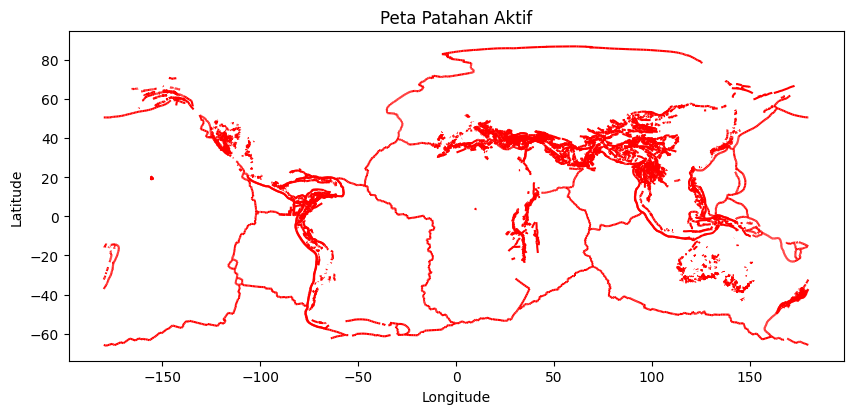

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Plotting data patahan aktif
fig, ax = plt.subplots(figsize=(10, 10))
data.plot(ax=ax, color='red', markersize=1)
ax.set_title('Peta Patahan Aktif')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

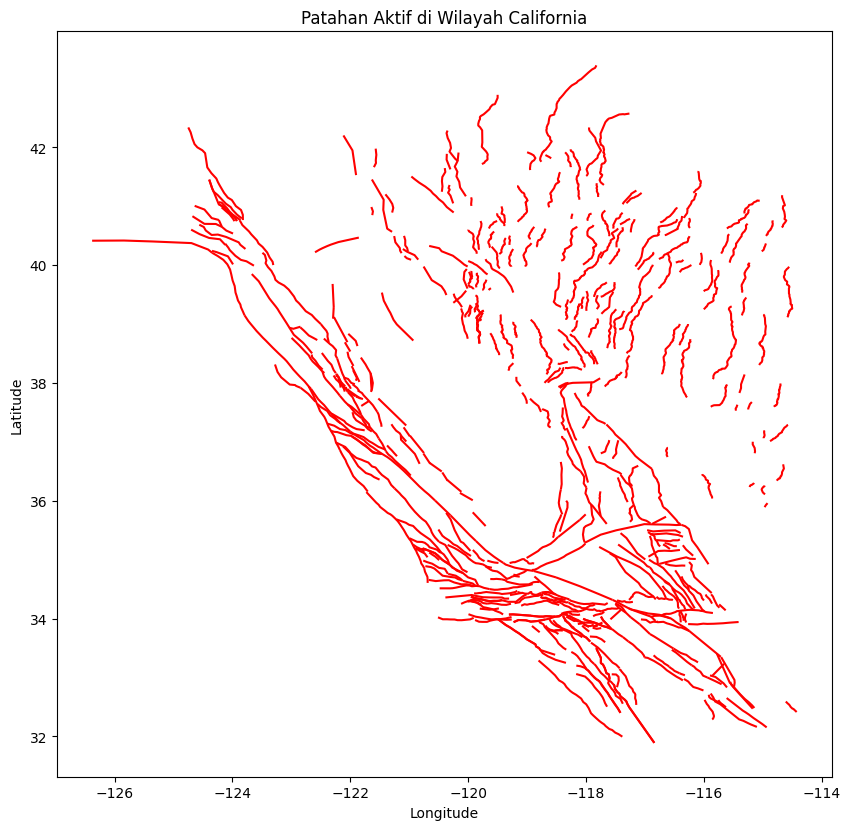

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat
min_lon, min_lat = -124.37, 32.55
max_lon, max_lat = -114.56, 41.99

# Memilih data yang berada di dalam batas koordinat yang ditentukan
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Plotting data patahan aktif di wilayah California
fig, ax = plt.subplots(figsize=(10, 10))
data_california.plot(ax=ax, color='red', markersize=1)
ax.set_title('Patahan Aktif di Wilayah California')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

/usr/local/lib/python3.10/dist-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


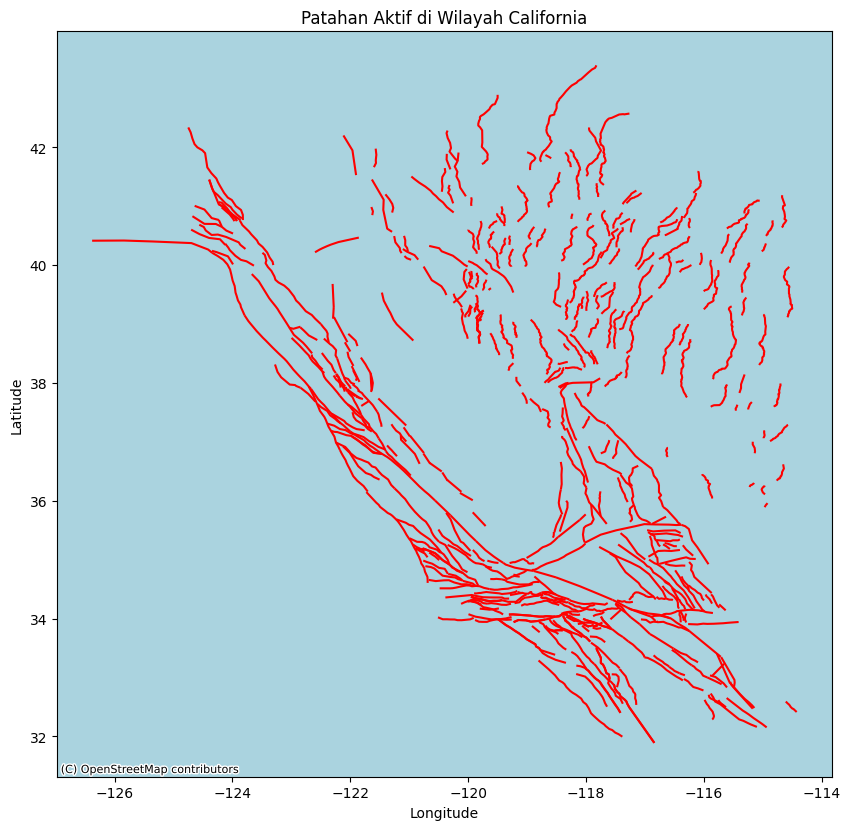

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat
min_lon, min_lat = -124.37, 32.55
max_lon, max_lat = -114.56, 41.99

# Memilih data yang berada di dalam batas koordinat yang ditentukan
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Plotting data patahan aktif di wilayah California
fig, ax = plt.subplots(figsize=(10, 10))
data_california.plot(ax=ax, color='red', markersize=1)
ax.set_title('Patahan Aktif di Wilayah California')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Menambahkan latar belakang peta menggunakan contextily
ctx.add_basemap(ax, crs=data_california.crs, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [5]:

import folium
import pandas as pd

# GitHub
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"

# Read dataset
df = pd.read_csv(github_url, sep=',')

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Calculate the center of the earthquake data region
center_lat = (max_lat + min_lat) / 2
center_lon = (max_lon + min_lon) / 2

# Calculate the appropriate zoom level to focus on the region with earthquake data
zoom_level = 8

# Create a map with the center location of the earthquake data area
m = folium.Map(location=[center_lat, center_lon], zoom_start=zoom_level)

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Add a marker for each earthquake on the map
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    for index, row in mag_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,  # Ukuran marker
            color=color,  # Warna marker
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Mag: {row['mag']}, Depth: {row['depth']} km"  # Informasi dalam popup
        ).add_to(m)

# Added a legend to the map with a vertical bar in the bottom left corner
legend_html = """

     Legend
     Magnitudo: 4-5
     Magnitudo: 5.1-6
     Magnitudo: 6.1-7
     Magnitudo: 7.1-9

     """

m.get_root().html.add_child(folium.Element(legend_html))

# save to HTML file
m.save("california_earthquake_map.html")

# display in notebook
m


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


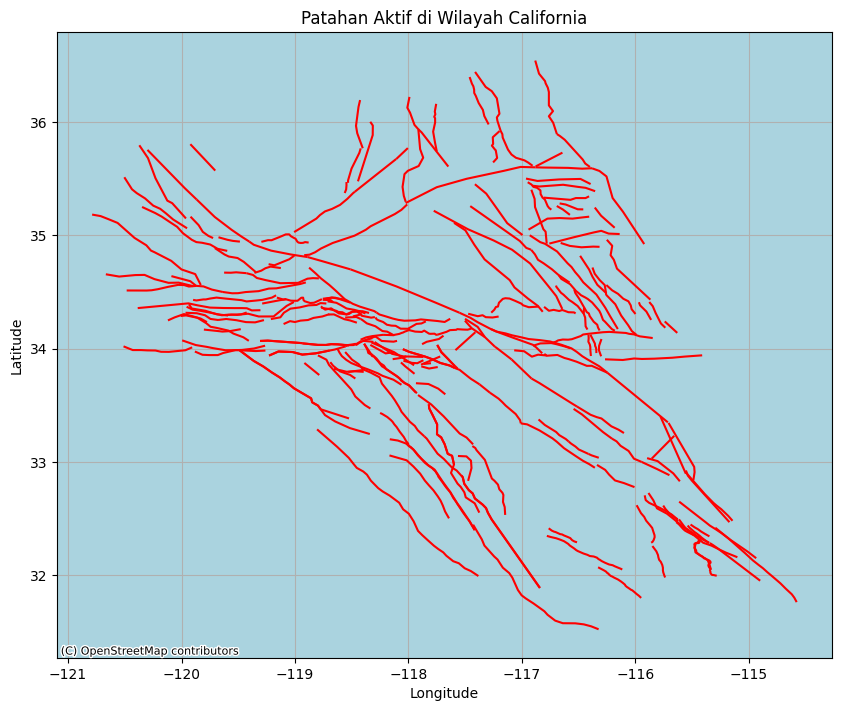

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat
min_lon, min_lat = -120, 32
max_lon, max_lat = -115, 36

# Memilih data yang berada di dalam batas koordinat yang ditentukan
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Plotting data patahan aktif di wilayah California
fig, ax = plt.subplots(figsize=(10, 10))
data_california.plot(ax=ax, color='red', markersize=1)
ax.set_title('Patahan Aktif di Wilayah California')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Menambahkan latar belakang peta menggunakan contextily
ctx.add_basemap(ax, crs=data_california.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Menambahkan grid
ax.grid(True)

plt.show()


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


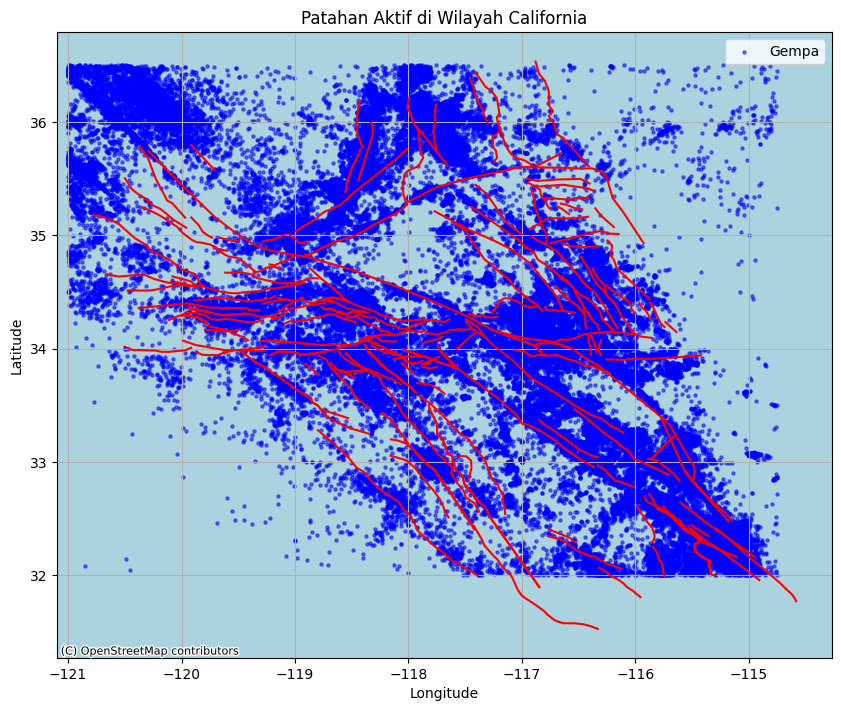

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat
min_lon, min_lat = -120, 32
max_lon, max_lat = -115, 36

# Memilih data patahan aktif di dalam batas koordinat yang ditentukan
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Plotting data patahan aktif di wilayah California
fig, ax = plt.subplots(figsize=(10, 10))
data_california.plot(ax=ax, color='red', markersize=1)
ax.set_title('Patahan Aktif di Wilayah California')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Menambahkan latar belakang peta menggunakan contextily
ctx.add_basemap(ax, crs=data_california.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Menambahkan grid
ax.grid(True)

# Memuat data gempa dari URL
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(github_url, sep=',')

# Plotting sebaran data gempa
plt.scatter(df['longitude'], df['latitude'], s=5, c='blue', alpha=0.5, label='Gempa')

# Menampilkan legenda
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


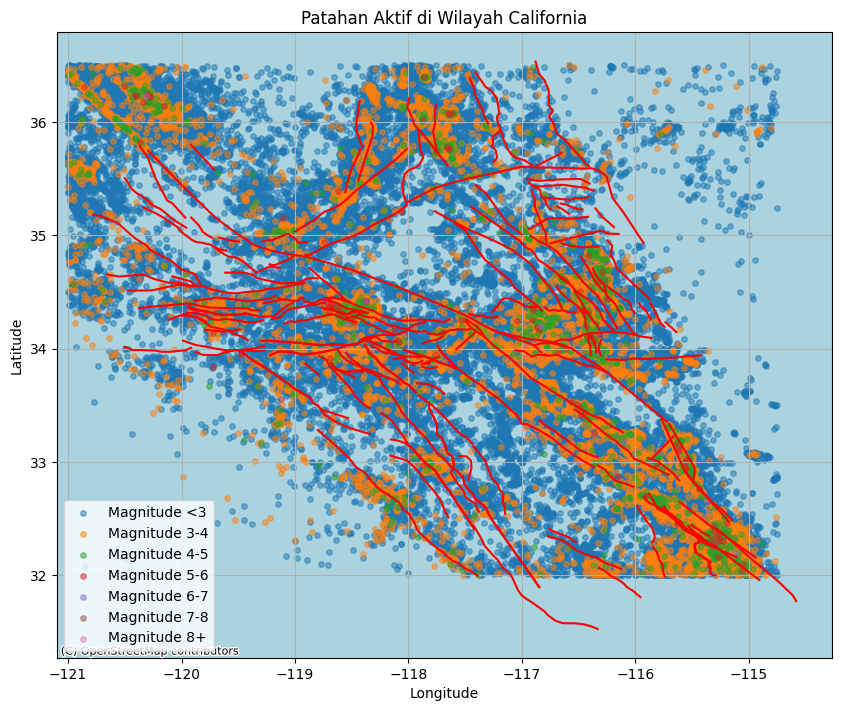

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat
min_lon, min_lat = -120, 32
max_lon, max_lat = -115, 36

# Memilih data patahan aktif di dalam batas koordinat yang ditentukan
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Plotting data patahan aktif di wilayah California
fig, ax = plt.subplots(figsize=(10, 10))
data_california.plot(ax=ax, color='red', markersize=1)
ax.set_title('Patahan Aktif di Wilayah California')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Menambahkan latar belakang peta menggunakan contextily
ctx.add_basemap(ax, crs=data_california.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Menambahkan grid
ax.grid(True)

# Memuat data gempa dari URL
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(github_url, sep=',')

# Mengelompokkan magnitudo ke dalam rentang
mag_bins = [0, 3, 4, 5, 6, 7, 8, df['mag'].max() + 1]  # Menambahkan 1 untuk memasukkan nilai maksimal
mag_labels = ['<3', '3-4', '4-5', '5-6', '6-7', '7-8', '8+']
df['mag_range'] = pd.cut(df['mag'], bins=mag_bins, labels=mag_labels)

# Plotting sebaran data gempa berdasarkan rentang magnitudo
for mag_label in mag_labels:
    temp_df = df[df['mag_range'] == mag_label]
    plt.scatter(temp_df['longitude'], temp_df['latitude'], s=15, alpha=0.5, label=f'Magnitude {mag_label}')

# Menampilkan legenda
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


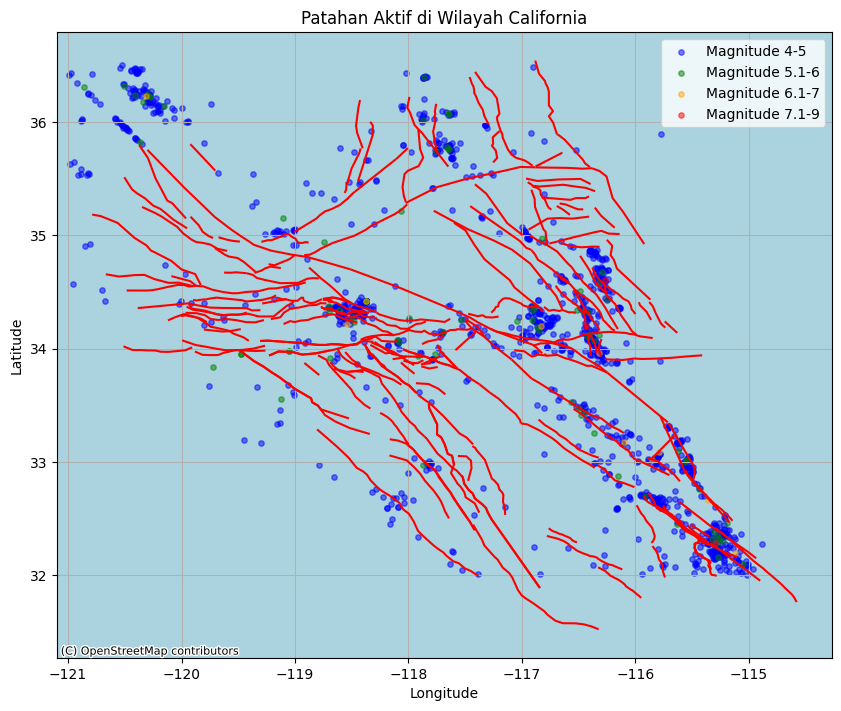

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat
min_lon, min_lat = -120, 32
max_lon, max_lat = -115, 36

# Memilih data patahan aktif di dalam batas koordinat yang ditentukan
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Plotting data patahan aktif di wilayah California
fig, ax = plt.subplots(figsize=(10, 10))
data_california.plot(ax=ax, color='red', markersize=1)
ax.set_title('Patahan Aktif di Wilayah California')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Menambahkan latar belakang peta menggunakan contextily
ctx.add_basemap(ax, crs=data_california.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Menambahkan grid
ax.grid(True)

# Memuat data gempa dari URL
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(github_url, sep=',')

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Plotting sebaran data gempa berdasarkan rentang magnitudo
for range_start, range_end, color, label in magnitude_ranges:
    temp_df = df[(df['mag'] >= range_start) & (df['mag'] < range_end)]
    plt.scatter(temp_df['longitude'], temp_df['latitude'], s=15, alpha=0.5, label=label, c=color)

# Menampilkan legenda
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


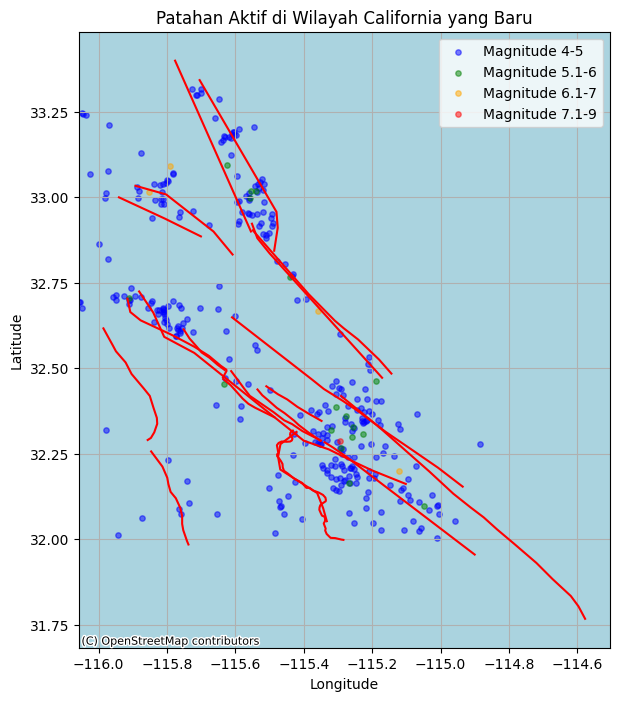

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat yang baru
min_lon, min_lat = -116, 32
max_lon, max_lat = -115, 33

# Memilih data patahan aktif di dalam batas koordinat yang baru
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Plotting data patahan aktif di wilayah California yang baru
fig, ax = plt.subplots(figsize=(8, 8))
data_california.plot(ax=ax, color='red', markersize=1)
ax.set_title('Patahan Aktif di Wilayah California yang Baru')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Menambahkan latar belakang peta menggunakan contextily
ctx.add_basemap(ax, crs=data_california.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Menambahkan grid
ax.grid(True)

# Memuat data gempa dari URL
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(github_url, sep=',')

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Plotting sebaran data gempa berdasarkan rentang magnitudo
for range_start, range_end, color, label in magnitude_ranges:
    temp_df = df[(df['mag'] >= range_start) & (df['mag'] < range_end)]
    plt.scatter(temp_df['longitude'], temp_df['latitude'], s=15, alpha=0.5, label=label, c=color)

# Menampilkan legenda
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


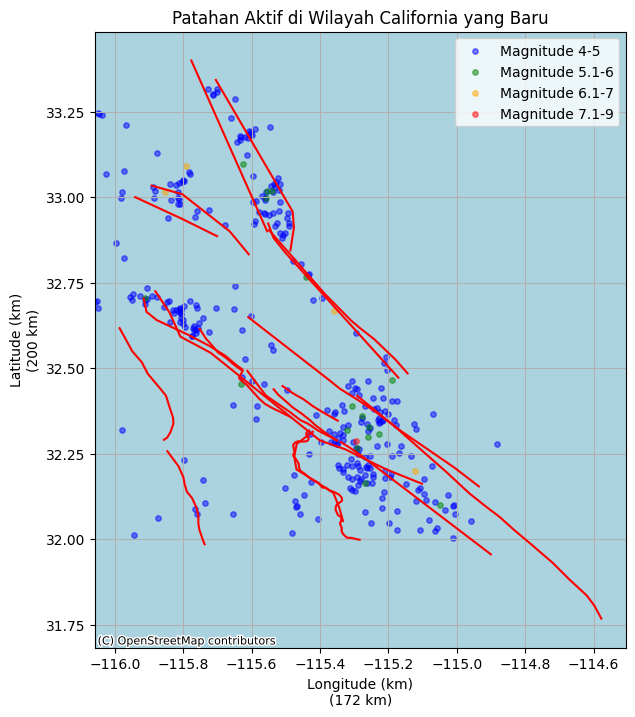

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
from shapely.geometry import Point
import geopy.distance

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat yang baru
min_lon, min_lat = -116, 32
max_lon, max_lat = -115, 33

# Memilih data patahan aktif di dalam batas koordinat yang baru
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Plotting data patahan aktif di wilayah California yang baru
fig, ax = plt.subplots(figsize=(8, 8))
data_california.plot(ax=ax, color='red', markersize=1)
ax.set_title('Patahan Aktif di Wilayah California yang Baru')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Menambahkan latar belakang peta menggunakan contextily
ctx.add_basemap(ax, crs=data_california.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Menambahkan grid
ax.grid(True)

# Memuat data gempa dari URL
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(github_url, sep=',')

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Plotting sebaran data gempa berdasarkan rentang magnitudo
for range_start, range_end, color, label in magnitude_ranges:
    temp_df = df[(df['mag'] >= range_start) & (df['mag'] < range_end)]
    plt.scatter(temp_df['longitude'], temp_df['latitude'], s=15, alpha=0.5, label=label, c=color)

# Menambahkan tanda pengukuran dalam km pada sumbu x
x_min, x_max = ax.get_xlim()
x_range_km = abs(x_max - x_min) * 111  # 1 derajat longitude sekitar 111 km
ax.set_xlabel(f'Longitude (km)\n({x_range_km:.0f} km)')

# Menambahkan tanda pengukuran dalam km pada sumbu y
y_min, y_max = ax.get_ylim()
y_range_km = abs(y_max - y_min) * 111  # 1 derajat latitude sekitar 111 km
ax.set_ylabel(f'Latitude (km)\n({y_range_km:.0f} km)')

# Menampilkan legenda
plt.legend()
plt.show()

In [12]:
import geopandas as gpd
import pandas as pd

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat yang baru
min_lon, min_lat = -116, 32
max_lon, max_lat = -115, 33

# Memilih data patahan aktif di dalam batas koordinat yang baru
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Tampilkan lima baris pertama dari data patahan dalam bentuk tabel
styled_table = data_california.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background', '#f2f2f2'), ('color', 'black'),
                                  ('font-family', 'Helvetica'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('font-family', 'Helvetica'), ('color', 'black')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background', '#fdfdfd')]},
    {'selector': 'tr:nth-of-type(even)', 'props': [('background', '#f9f9f9')]},
])

styled_table.set_properties(**{'text-align': 'center'}).hide_index()
display(styled_table)


<ipython-input-12-ce90b3419f24>:24: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled_table.set_properties(**{'text-align': 'center'}).hide_index()


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


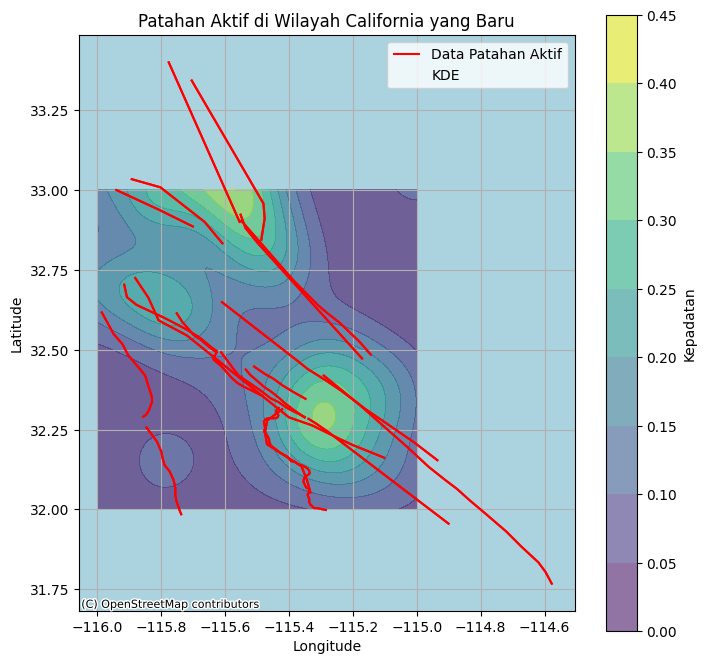

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
from sklearn.neighbors import KernelDensity
import numpy as np

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat yang baru
min_lon, min_lat = -116, 32
max_lon, max_lat = -115, 33

# Memilih data patahan aktif di dalam batas koordinat yang baru
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Plotting data patahan aktif di wilayah California yang baru
fig, ax = plt.subplots(figsize=(8, 8))
data_california.plot(ax=ax, color='red', markersize=1)
ax.set_title('Patahan Aktif di Wilayah California yang Baru')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Menambahkan latar belakang peta menggunakan contextily
ctx.add_basemap(ax, crs=data_california.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Menambahkan grid
ax.grid(True)

# Memuat data gempa dari URL
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(github_url, sep=',')

# Menggunakan titik-titik gempa untuk KDE
points = np.vstack([df['longitude'], df['latitude']]).T

# Menghitung KDE
kde = KernelDensity(bandwidth=0.1)  # Bandwidth dapat disesuaikan
kde.fit(points)

# Membuat grid untuk evaluasi KDE
x = np.linspace(min_lon, max_lon, 100)
y = np.linspace(min_lat, max_lat, 100)
X, Y = np.meshgrid(x, y)
xy = np.vstack([X.ravel(), Y.ravel()]).T
Z = np.exp(kde.score_samples(xy))
Z = Z.reshape(X.shape)

# Plotting KDE
plt.contourf(X, Y, Z, cmap='viridis', alpha=0.6)
plt.colorbar(label='Kepadatan')

# Menambahkan data patahan aktif ke plot
data_california.plot(ax=plt.gca(), color='red', markersize=1)

# Menampilkan legenda
plt.legend(['Data Patahan Aktif', 'KDE'])

plt.show()


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


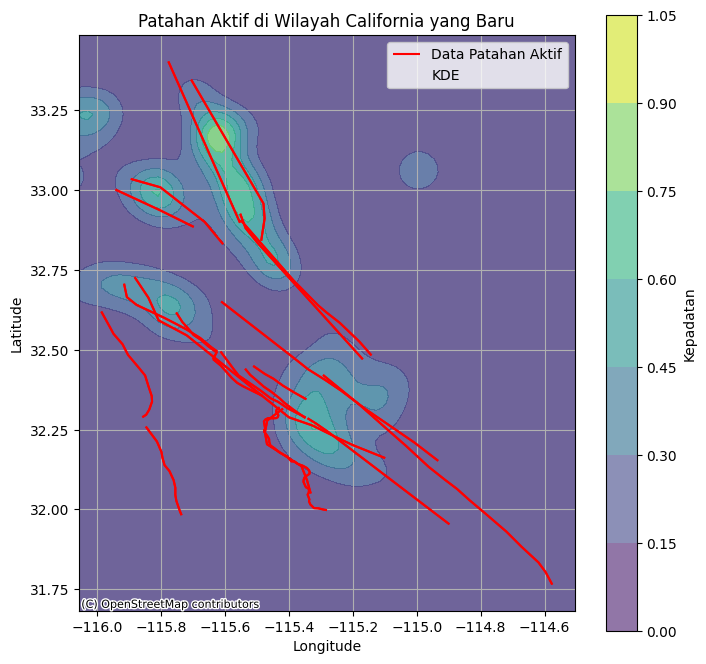

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
from sklearn.neighbors import KernelDensity
import numpy as np

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat yang baru
min_lon, min_lat = -116, 32
max_lon, max_lat = -115, 33

# Memilih data patahan aktif di dalam batas koordinat yang baru
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Plotting data patahan aktif di wilayah California yang baru
fig, ax = plt.subplots(figsize=(8, 8))
data_california.plot(ax=ax, color='red', markersize=1)
ax.set_title('Patahan Aktif di Wilayah California yang Baru')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Menambahkan latar belakang peta menggunakan contextily
ctx.add_basemap(ax, crs=data_california.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Menambahkan grid
ax.grid(True)

# Memuat data gempa dari URL
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(github_url, sep=',')

# Menggunakan titik-titik gempa untuk KDE
points = np.vstack([df['longitude'], df['latitude']]).T

# Membuat grid yang lebih besar untuk evaluasi KDE
x = np.linspace(-118, -114, 200)  # Membesar area lonjitudinal
y = np.linspace(30, 34, 200)      # Membesar area latitudinal
X, Y = np.meshgrid(x, y)
xy = np.vstack([X.ravel(), Y.ravel()]).T

# Menghitung KDE
kde = KernelDensity(bandwidth=0.05)  # Menyesuaikan bandwidth
kde.fit(points)

Z = np.exp(kde.score_samples(xy))
Z = Z.reshape(X.shape)

# Plotting KDE
plt.contourf(X, Y, Z, cmap='viridis', alpha=0.6)
plt.colorbar(label='Kepadatan')

# Menambahkan data patahan aktif ke plot
data_california.plot(ax=plt.gca(), color='red', markersize=1)

# Menampilkan legenda
plt.legend(['Data Patahan Aktif', 'KDE'])

plt.show()


In [15]:
import geopandas as gpd
import pandas as pd
from sklearn.neighbors import KernelDensity
import numpy as np

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat yang baru
min_lon, min_lat = -116, 32
max_lon, max_lat = -115, 33

# Memilih data patahan aktif di dalam batas koordinat yang baru
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Memuat data gempa dari URL
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(github_url, sep=',')

# Menggunakan titik-titik gempa untuk KDE
points = np.vstack([df['longitude'], df['latitude']]).T

# Membuat grid yang lebih besar untuk evaluasi KDE
x = np.linspace(-118, -114, 200)  # Membesar area lonjitudinal
y = np.linspace(30, 34, 200)      # Membesar area latitudinal
X, Y = np.meshgrid(x, y)
xy = np.vstack([X.ravel(), Y.ravel()]).T

# Menghitung KDE
kde = KernelDensity(bandwidth=0.05)  # Menyesuaikan bandwidth
kde.fit(points)

Z = np.exp(kde.score_samples(xy))
Z = Z.reshape(X.shape)

# Konversi hasil KDE ke dalam dataframe pandas
density_df = pd.DataFrame({'Longitude': X.ravel(), 'Latitude': Y.ravel(), 'Density': Z.ravel()})

# Pilih 20 data dengan nilai density tidak kosong
valid_data = density_df[density_df['Density'].notnull()].head(20)

# Menampilkan 20 data pertama dengan nilai density tidak kosong dalam tabel yang rapi
styled_table = valid_data.style.set_table_styles([
    {'selector': 'th', 'props': [('background', '#f2f2f2'), ('color', 'black'),
                                  ('font-family', 'Helvetica'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('font-family', 'Helvetica'), ('color', 'black')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background', '#fdfdfd')]},
    {'selector': 'tr:nth-of-type(even)', 'props': [('background', '#f9f9f9')]},
])

styled_table.set_properties(**{'text-align': 'center'}).hide_index()
styled_table

<ipython-input-15-480baa19c637>:52: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled_table.set_properties(**{'text-align': 'center'}).hide_index()


In [16]:
valid_data = density_df[density_df['Density'] > 0].head(120)
valid_data

Longitude   Latitude        Density
878  -116.432161  30.080402  4.940656e-324
879  -116.412060  30.080402  4.940656e-324
880  -116.391960  30.080402  4.940656e-324
881  -116.371859  30.080402  4.940656e-324
882  -116.351759  30.080402  9.881313e-324
...          ...        ...            ...
1061 -116.773869  30.100503  7.781633e-319
1062 -116.753769  30.100503  9.311013e-319
1063 -116.733668  30.100503  1.163732e-318
1064 -116.713568  30.100503  1.350044e-318
1065 -116.693467  30.100503  1.383073e-318

[120 rows x 3 columns]

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
from scipy.spatial import distance

# Memuat data Shapefile dari URL
shapefile_url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/shapefile/gem_active_faults.shp'
data = gpd.read_file(shapefile_url)

# Mengatur batas koordinat
min_lon, min_lat = -120, 32
max_lon, max_lat = -115, 36

# Memilih data patahan aktif di dalam batas koordinat yang ditentukan
data_california = data.cx[min_lon:max_lon, min_lat:max_lat]

# Ambil koordinat titik-titik dari data patahan aktif
coords = data_california.geometry.apply(lambda geom: (geom.x, geom.y)).to_list()

# Hitung jarak antara setiap pasang titik
distances = distance.cdist(coords, coords, 'euclidean')

# Simpan jarak antar titik dalam DataFrame Pandas
distance_df = pd.DataFrame(distances, columns=range(len(coords)), index=range(len(coords)))

# Tampilkan tabel jarak antar titik dalam format yang lebih baik
with pd.option_context('display.max_columns', None):
    print(distance_df)


AttributeError: ignored